# Genetic Algorithms

If a linear equation is given by:

$ x_1+ x_2 + x_3 + x_4 + x_5 + x_6 = 371$

find $x_1, x_2 \dots , x_6$, where $x_i \in Z$ such that $0 \leq x_i \leq 100$ 

or in other words find six inteters between 0 and 100 whos sum equals 371

In [1]:
from random import randint, random

def individual(length, min, max):
    'Create a member of the population.'
    return [randint(min,max) for x in range(length)]


In [2]:
print(individual(8,1,7))

[2, 3, 4, 1, 7, 6, 2, 2]


In [3]:
def population(count, length, min, max):
    """
    Create a number of individuals (i.e. a population).

    count: the number of individuals in the population
    length: the number of values per individual
    min: the minimum possible value in an individual's list of values
    max: the maximum possible value in an individual's list of values

    """
    return [individual(length, min, max) for x in range(count)]


In [6]:
t = population(5,8,1,8)
print(t)

[[3, 5, 3, 2, 8, 5, 3, 7], [7, 6, 7, 6, 5, 1, 1, 5], [3, 1, 4, 8, 7, 4, 7, 6], [8, 3, 6, 5, 3, 7, 4, 7], [8, 5, 6, 6, 5, 5, 5, 5]]


In [7]:
def fitness(individual, target):
    """
    Determine the fitness of an individual. Higher is better.

    individual: the individual to evaluate
    target: the target number individuals are aiming for
    """
  
    total = sum(individual)
    return abs(target-total)

In [8]:
def grade(pop, target):
    """Find average fitness for a population."""
 
    summed = sum([fitness(x,target) for x in pop])
    return summed / (len(pop) * 1.0)

In [9]:
def evolve(pop, target, retain=0.2, random_select=0.05, mutate=0.01):
    """
    Evolve executes one step of GA. 
    retain: fraction of poppulation to be retained.
    reandom_select: probability of selection for retention
    mutation: probability of mutation
    """
    # find the fitness of all indivutuals in the population and store in a list of tuples
    # (fitness, indivitual)
    graded = [ (fitness(indv, target), indv) for indv in pop] 
    #print(graded)
    
    # sort the population on fitness (col 0) and extract the indivitulas(col 1)
    graded = [ indv[1] for indv in sorted(graded)]
    #print(graded)
    
    # calculate the leng number of individuals to be retained. 
    retain_length = int(len(graded)*retain)
    # store the individuals to be retained into parantes
    parents = graded[:retain_length]
   
    # randomly select some remaining indiviuals for inclusion among parents
    for individual in graded[retain_length:]:
        if random_select > random():
            parents.append(individual)
    
    # ranomly mutate some individuals
    for individual in parents:
        if mutate > random():
            pos_to_mutate = randint(0, len(individual)-1)
            # this mutation is not ideal, because it
            # restricts the range of possible values,
            # but the function is unaware of the min/max
            # values used to create the individuals,
            individual[pos_to_mutate] = randint(
                min(individual), max(individual))
    
    
    # crossover parents to create children
    # find the number of parents
    parents_length = len(parents)
    # find the number of new individuals needed to 
    # complete the population. 
    desired_length = len(pop) - parents_length
    
    # create children 
    children = []
    while len(children) < desired_length:
        parent_aidx = randint(0, parents_length-1)
        parent_bidx = randint(0, parents_length-1)
        if parent_aidx != parent_bidx:
            parent_a = parents[parent_aidx]
            parent_b = parents[parent_bidx]
            half = len(parent_a) // 2
            child = parent_a[:half] + parent_b[half:]
            children.append(child)        
    parents.extend(children)
    return parents

In [10]:
target = 371
p_count = 100
i_length = 6
i_min = 0
i_max = 100
p = population(p_count, i_length, i_min, i_max)
fitness_history = [grade(p, target),]
for i in range(50):
    p = evolve(p, target)
    
    fitness_history.append(grade(p, target))

for datum in fitness_history:
   print('Fitness:',datum)


Fitness: 91.2
Fitness: 49.06
Fitness: 45.3
Fitness: 30.6
Fitness: 24.37
Fitness: 22.26
Fitness: 18.48
Fitness: 7.26
Fitness: 5.94
Fitness: 3.78
Fitness: 1.32
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 2.87
Fitness: 0.0
Fitness: 1.25
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 1.48
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.39
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 1.8
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.42
Fitness: 0.0
Fitness: 0.0
Fitness: 2.16
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0


In [11]:
p

[[28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 [28, 93, 13, 93, 87, 57],
 

In [12]:
sum(p[0])

371

# Solving The Eight Queens Problem

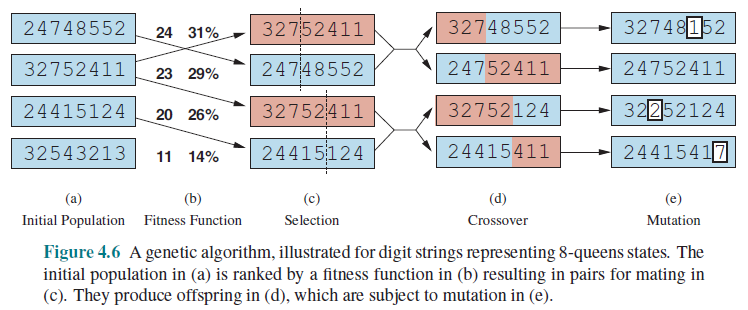




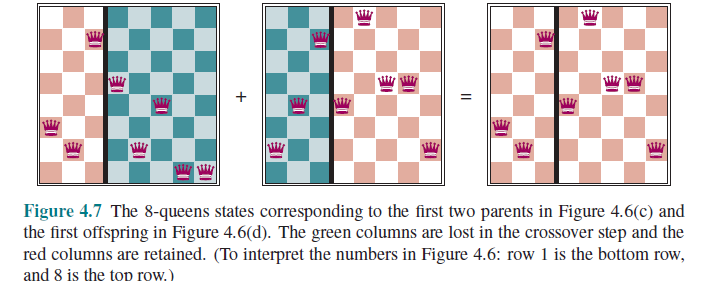

In [13]:
def fitness(state,target):
    """
    Determine the fitness of an individual. Higher is better.

    individual: the individual to evaluate
    """
    
    horizontal_collisions = sum([state.count(col)-1 for col in state])/2
    diagonal_collisions = 0
    for i, col in enumerate(state):
        for j, diagonal in enumerate(state):
            mod = abs(i-j)
            if mod < 0: #we don't want to count the current queen in a collision with herself
                if diagonal + mod == col or diagonal - mod == col:
                    diagonal_collisions += 1
    diagonal_collisions /= 2 #we were counting the diagonal collisions double
    fitness = int(28 - (horizontal_collisions + diagonal_collisions))
    return target-fitness

In [14]:
target = 28
p_count = 100
i_length = 8
i_min = 1
i_max = 8

gen=1500

p = population(p_count, i_length, i_min, i_max)
fitness_history = [grade(p, target),]
for i in range(gen):
    p = evolve(p, target)
    fitness_history.append(grade(p, target))

for datum in fitness_history:
   print('Fitness:',datum)

#print(p)

Fitness: 3.23
Fitness: 2.67
Fitness: 1.92
Fitness: 1.48
Fitness: 1.14
Fitness: 1.09
Fitness: 1.09
Fitness: 1.03
Fitness: 1.14
Fitness: 1.07
Fitness: 1.13
Fitness: 1.05
Fitness: 1.05
Fitness: 1.09
Fitness: 1.11
Fitness: 1.2
Fitness: 1.25
Fitness: 1.23
Fitness: 1.38
Fitness: 1.35
Fitness: 1.12
Fitness: 0.32
Fitness: 0.08
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.01
Fitness: 0.03
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.04
Fitness: 0.0
Fitness: 0.02
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.08
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.07
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.05
Fitness: 0.0
Fitness: 0.0
Fitness: 

Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.03
Fitness: 0.01
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.02
Fitness: 0.1
Fitness: 0.0
Fitness: 0.05
Fitness: 0.0
Fitness: 0.01
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.06
Fitness: 0.0
Fitness: 0.05
Fitness: 0.05
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.04
Fitness: 0.0
Fitness: 0.05
Fitness: 0.06
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.05
Fitness: 0.05
Fitness: 0.0
Fitness: 0.0
Fitness: 0.03
Fitness: 0.0
Fitness: 0.0
Fitness: 0.04
Fitness: 0.0
Fitness: 0.0
Fitness: 0.09
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.04
Fitness: 0.07
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.0
Fitness: 0.06
Fitness: 0.0
Fitness: 0.0
Fitnes

In [15]:
p

[[2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 [2, 3, 4, 8, 1, 6, 5, 7],
 

In [16]:
a = [2, 3, 4, 8, 1, 6, 5, 7]
print(sorted(a))

[1, 2, 3, 4, 5, 6, 7, 8]
